# Libraries

In [6]:
import matplotlib.pyplot as plt
import seaborn as srn
import sklearn.model_selection
import catboost as cbt
import xgboost as xgb
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.naive_bayes import GaussianNB

# Data gathering and simple visualization

In [7]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [8]:
df=pd.read_csv("../datasets/Transformed Data Set - Sheet1.csv")
df

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
0,Cool,Rock,Vodka,7UP/Sprite,F
1,Neutral,Hip hop,Vodka,Coca Cola/Pepsi,F
2,Warm,Rock,Wine,Coca Cola/Pepsi,F
3,Warm,Folk/Traditional,Whiskey,Fanta,F
4,Cool,Rock,Vodka,Coca Cola/Pepsi,F
...,...,...,...,...,...
61,Cool,Rock,Vodka,Coca Cola/Pepsi,M
62,Cool,Hip hop,Beer,Coca Cola/Pepsi,M
63,Neutral,Hip hop,Doesn't drink,Fanta,M
64,Cool,Rock,Wine,Coca Cola/Pepsi,M


Shape of the dataframe

In [9]:
print('shape of the dataframe is   : ',df.shape)

shape of the dataframe is   :  (66, 5)


Surely it is a very small dataset.

Visualizing and finding unique terms in the dataframe

In [10]:
a=df['Favorite Color'].value_counts()
colr=a.index
a

Cool       37
Warm       22
Neutral     7
Name: Favorite Color, dtype: int64

In [11]:
a=df['Favorite Music Genre'].value_counts()
mgn=a.index
a

Rock                19
Pop                 17
Hip hop              8
Electronic           8
R&B and soul         6
Folk/Traditional     4
Jazz/Blues           4
Name: Favorite Music Genre, dtype: int64

In [12]:
a=df['Favorite Beverage'].value_counts()
fbv=a.index
a

Doesn't drink    14
Beer             13
Other            11
Wine             10
Vodka             9
Whiskey           9
Name: Favorite Beverage, dtype: int64

In [13]:
a=df['Favorite Soft Drink'].value_counts()
fsd=a.index
a

Coca Cola/Pepsi    32
Fanta              14
7UP/Sprite         13
Other               7
Name: Favorite Soft Drink, dtype: int64

In [14]:
a=df['Gender'].value_counts()
gen=a.index
a

F    33
M    33
Name: Gender, dtype: int64

From above we can see the data is ***leakage-free data***

# EDA

* Favorite Color

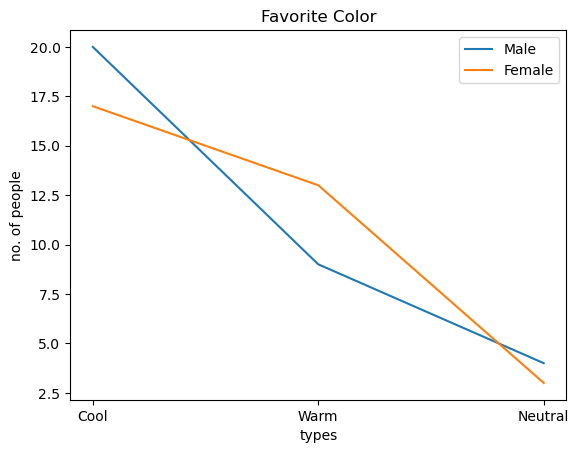

In [15]:
male=df[df['Gender']=='M']
female=df[df['Gender']=='F']
x=[]
y=[]
for i in range(len(colr)):
    x.append(len(male[male['Favorite Color']==colr[i]]))
    y.append(len(female[female['Favorite Color']==colr[i]]))
plt.plot(colr,x,label='Male')
plt.legend()
plt.plot(colr,y,label='Female')
plt.legend()
plt.title('Favorite Color')
plt.xlabel('types')
plt.ylabel('no. of people')
plt.show()

It's visible that men are more attracted towards cool colors like blue green and women are to yellow ,red,violet

* Favorite Music Genre

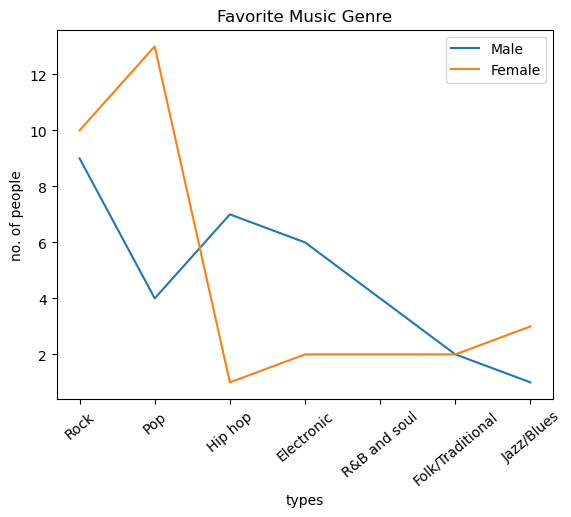

In [16]:
x=[]
y=[]
for i in range(len(mgn)):
    x.append(len(male[male['Favorite Music Genre']==mgn[i]]))
    y.append(len(female[female['Favorite Music Genre']==mgn[i]]))
plt.plot(mgn,x,label='Male')
plt.legend()
plt.plot(mgn,y,label='Female')
plt.legend()
plt.xticks(rotation =40)
plt.title('Favorite Music Genre')
plt.xlabel('types')
plt.ylabel('no. of people')
plt.show()

Looks like men are attarcted towards modern musics than women

* Favorite Beverage

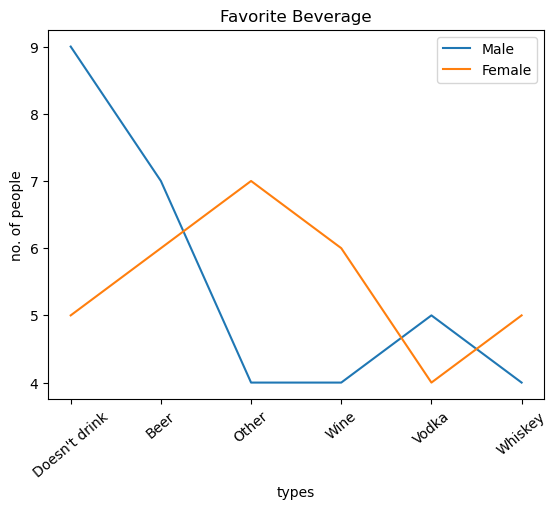

In [17]:
x=[]
y=[]
for i in range(len(fbv)):
    x.append(len(male[male['Favorite Beverage']==fbv[i]]))
    y.append(len(female[female['Favorite Beverage']==fbv[i]]))
plt.plot(fbv,x,label='Male')
plt.legend()
plt.plot(fbv,y,label='Female')
plt.legend()
plt.xticks(rotation =40)
plt.title('Favorite Beverage')
plt.xlabel('types')
plt.ylabel('no. of people')
plt.show()

Seems women are attracted to hard drink than men. Small data provided this unlikeliness XD

* Favorite Soft Drink

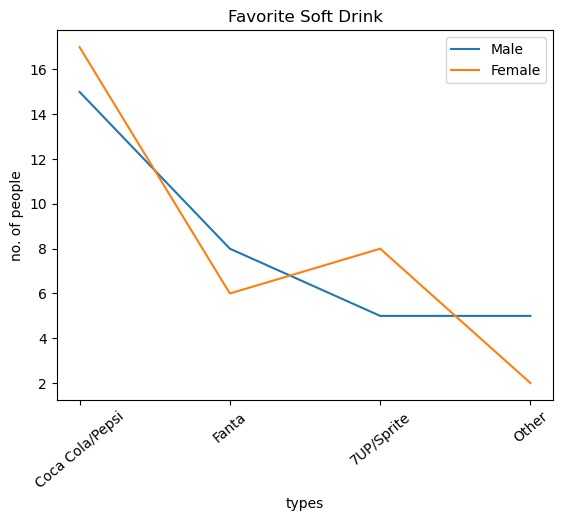

In [18]:
x=[]
y=[]
for i in range(len(fsd)):
    x.append(len(male[male['Favorite Soft Drink']==fsd[i]]))
    y.append(len(female[female['Favorite Soft Drink']==fsd[i]]))
plt.plot(fsd,x,label='Male')
plt.legend()
plt.plot(fsd,y,label='Female')
plt.legend()
plt.xticks(rotation =40)
plt.title('Favorite Soft Drink')
plt.xlabel('types')
plt.ylabel('no. of people')
plt.show()

It is clear that soft drink taste has inferior **GNEDER BIAS**

* ***Encoding***

The encoding are done **manually** as a beginner can understand with ease !

* Favorite color

In [19]:
for i in range(len(colr)):
    df['Favorite Color'].replace(colr[i],i,inplace=True)
df

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
0,0,Rock,Vodka,7UP/Sprite,F
1,2,Hip hop,Vodka,Coca Cola/Pepsi,F
2,1,Rock,Wine,Coca Cola/Pepsi,F
3,1,Folk/Traditional,Whiskey,Fanta,F
4,0,Rock,Vodka,Coca Cola/Pepsi,F
...,...,...,...,...,...
61,0,Rock,Vodka,Coca Cola/Pepsi,M
62,0,Hip hop,Beer,Coca Cola/Pepsi,M
63,2,Hip hop,Doesn't drink,Fanta,M
64,0,Rock,Wine,Coca Cola/Pepsi,M


Favorite Music Genre

In [20]:
for i in range(len(mgn)):
    df['Favorite Music Genre'].replace(mgn[i],i,inplace=True)
df

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
0,0,0,Vodka,7UP/Sprite,F
1,2,2,Vodka,Coca Cola/Pepsi,F
2,1,0,Wine,Coca Cola/Pepsi,F
3,1,5,Whiskey,Fanta,F
4,0,0,Vodka,Coca Cola/Pepsi,F
...,...,...,...,...,...
61,0,0,Vodka,Coca Cola/Pepsi,M
62,0,2,Beer,Coca Cola/Pepsi,M
63,2,2,Doesn't drink,Fanta,M
64,0,0,Wine,Coca Cola/Pepsi,M


* Favorite Beverage

In [21]:
for i in range(len(fbv)):
    df['Favorite Beverage'].replace(fbv[i],i,inplace=True)
df

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
0,0,0,4,7UP/Sprite,F
1,2,2,4,Coca Cola/Pepsi,F
2,1,0,3,Coca Cola/Pepsi,F
3,1,5,5,Fanta,F
4,0,0,4,Coca Cola/Pepsi,F
...,...,...,...,...,...
61,0,0,4,Coca Cola/Pepsi,M
62,0,2,1,Coca Cola/Pepsi,M
63,2,2,0,Fanta,M
64,0,0,3,Coca Cola/Pepsi,M


* Favorite Soft Drink

In [22]:
for i in range(len(fsd)):
    df['Favorite Soft Drink'].replace(fsd[i],i,inplace=True)
df

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
0,0,0,4,2,F
1,2,2,4,0,F
2,1,0,3,0,F
3,1,5,5,1,F
4,0,0,4,0,F
...,...,...,...,...,...
61,0,0,4,0,M
62,0,2,1,0,M
63,2,2,0,1,M
64,0,0,3,0,M


* Gender

In [23]:
for i in range(len(gen)):
    df['Gender'].replace(gen[i],i,inplace=True)
df

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
0,0,0,4,2,0
1,2,2,4,0,0
2,1,0,3,0,0
3,1,5,5,1,0
4,0,0,4,0,0
...,...,...,...,...,...
61,0,0,4,0,1
62,0,2,1,0,1
63,2,2,0,1,1
64,0,0,3,0,1


The data has been numerated now .

We can perform some analysis now.

# Pipeline

To predict the data we have to split the X and Y from the data

In [24]:
X_df=df.drop('Gender',1)
y_df=df['Gender']

/tmp/ipykernel_908/3866954848.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_df=df.drop('Gender',1)


In [25]:
print('shape of X_df :',X_df.shape)
print('shape of y_df :',y_df.shape)

shape of X_df : (66, 4)
shape of y_df : (66,)


As the data is very short we will use the whole data as training data and use itself in test also.

Let's use some classifier to  predict the data and get a reasonable outcome

Let's try dummy clssifier first

In [26]:
model=DummyClassifier()
model

DummyClassifier()

In [27]:
x1=X_df
y1=y_df
model.fit(x1,y1)
y_pred1=model.predict(x1)
print('accuracy of the classifier :',model.score(x1,y1))

accuracy of the classifier : 0.5


This classifier outputs a average prediction score as the data is very short

RandomForestClassifier

In [28]:
model=RandomForestClassifier(random_state=0)

In [29]:
model.fit(x1,y1)
y_pred2=model.predict(x1)
print('acuuracy of the model :',model.score(x1,y1))

acuuracy of the model : 0.9545454545454546


Woah ! The RandomForest really gave a very good prediction over the training the data 

* Support Vector Machine

In [30]:
model=svm.SVC()

In [31]:
model.fit(x1,y1)
print('acuuracy of the model :',model.score(x1,y1))

acuuracy of the model : 0.7727272727272727


This is a good accuracy . still less then RFC

* Gaussian Naive Bayes method

In [32]:
model=GaussianNB()

In [33]:
model.fit(x1,y1)
print('acuuracy of the model :',model.score(x1,y1))

acuuracy of the model : 0.6060606060606061


As naive bayes need huge amount of data to restore a good prediction that clearly results a less accurate prediction

***Conclusion*** :
          * As the data is very small in size the classifier fails to perfectly fit the data and submit quite good accuracy.
          * Still RFC has a better score than othr models.
          * As decision tree models can fit appropriately over medium-small data ,it produces a larger accuracy.
          
          

# Please **UPVOTE** if you like it :)

You can join my discord server where I try to analyze over mant datasets: Discord Link : https://discord.gg/zSK9an6J (Atlantic Data Studio)

# THE END